In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import time

In [2]:
# Load environment variables from .env file
load_dotenv()

# CoinMarketCap API URL
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

# Fetch API key from environment variables
api_key = os.getenv('COINMARKETCAP_API_KEY')

In [3]:
parameters = {
            'start': '1',
            'limit': '1000',  # Fetching top 100 cryptocurrencies
            'convert': 'USD'
        }

        # Headers containing your API key
headers = {
            'Accepts': 'application/json',
            'X-CMC_PRO_API_KEY': api_key,
        }

        # Make a GET request to the CoinMarketCap API
response = requests.get(url, headers=headers, params=parameters)
        
        # Check for HTTP errors
response.raise_for_status()
        
        # Load data into pandas DataFrame
data = response.json()
df = pd.json_normalize(data['data'])  # Normalize JSON data into DataFrame


In [4]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11134,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.971666e+07,1.971666e+07,...,1.222071e+12,53.4591,1.301615e+12,NaN,2024-06-25T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9097,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201769e+08,1.201769e+08,...,4.101068e+11,17.9383,4.101068e+11,NaN,2024-06-25T18:39:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,89820,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.129344e+11,1.160774e+11,...,1.128953e+11,4.9381,1.160373e+11,NaN,2024-06-25T18:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475835e+08,1.475835e+08,...,8.523862e+10,3.7284,8.523862e+10,NaN,2024-06-25T18:39:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,691,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.622524e+08,5.789304e+08,...,6.393931e+10,2.7967,8.007836e+10,NaN,2024-06-25T18:39:00.000Z,NaN,NaN,NaN,NaN,NaN


In [5]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = df.loc[:,["name","quote.USD.market_cap"] ]

In [6]:
print(market_cap_raw.count())

name                    1000
quote.USD.market_cap    1000
dtype: int64


In [7]:
# Filtering out rows without a market capitalization
cap = market_cap_raw[market_cap_raw['quote.USD.market_cap'] > 0]

# Counting the number of values again
print(cap.count())

name                    1000
quote.USD.market_cap    1000
dtype: int64


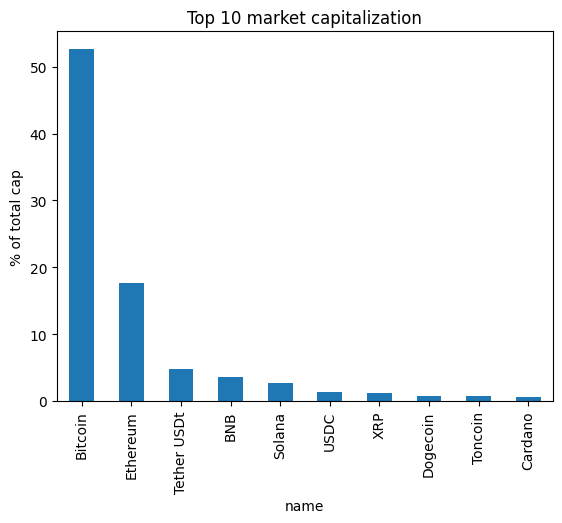

In [8]:
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Assuming 'cap' is your filtered DataFrame with 'id' and 'quote.USD.market_cap' columns
cap10 = cap.head(10)
cap10 = cap10.set_index("name")
cap10 = cap10.assign(market_cap_perc=lambda x: (x['quote.USD.market_cap'] / cap['quote.USD.market_cap'].sum()) * 100)

import matplotlib.pyplot as plt

# Plotting the bar plot
ax = cap10['market_cap_perc'].plot(kind='bar', title=TOP_CAP_TITLE, ylabel=TOP_CAP_YLABEL)

# Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)

# Show the plot
plt.show()


[Text(0, 0.5, 'USD'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Top 10 market capitalization')]

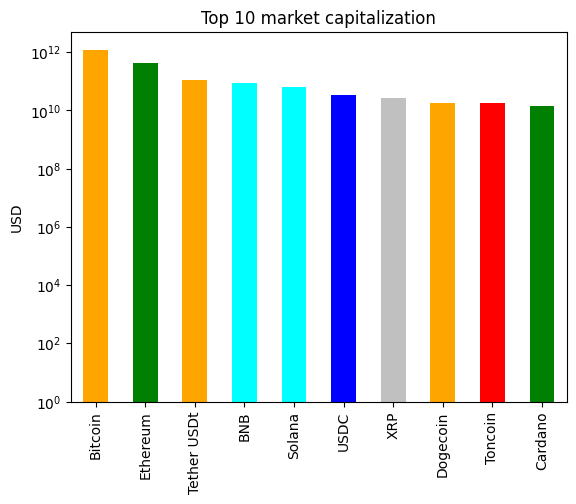

In [9]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd with custom colors and logarithmic scale
ax = cap10['quote.USD.market_cap'].plot.bar(color=COLORS, log=True)


# Annotating the y axis with 'USD'
ax.set(ylabel = "USD" , xlabel = "" , title = "Top 10 market capitalization")

# Final touch! Removing the xlabel as it is not very informative
